In [11]:
%matplotlib inline

In [16]:
import torch 
from torch.autograd import Variable 
import matplotlib.pyplot as plt 

#data prep
x_data = Variable(torch.Tensor([[1.0],[2.0],[3.0]]))
y_data = Variable(torch.Tensor([[2.0],[4.0],[6.0]]))

#model generation 
class Model(torch.nn.Module):
    
    """
    # torch.nn은 torch.neural network 를 의미한다. 
    # nn.Module은 여러개의 레이어와 output을 return하는 forward(input) 메소드를 
    # 포함한다. 
    
    # 모든 뉴럴 네트워크는 기본 클래스 nn.Module로부터 파생 
    # 생성자(constructor)에서 사용하고자 하는 모든 레이어를 선언 
    # forward(input)함수에서 입력으로부터 결과까지 모델이 어떻게 실행되는지 정의
    
    # torch.nn 은 mini-batch만을 지원한다. 전체 torch.nn 패키지는 mini-batch
    # 형태인 입력만을 지우너하며, 단일 데이터는 입력으로 지원하지 않는다. 
    # 만약 단일 샘플(1개의 데이터)이 있다면 input.unsqueeze(0)을 사용하여 
    # 가짜 임시 배치 차원을 추가
    
    """
    
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module 
        
        """
        
        super(Model,self).__init__()
        #torch.nn.Module 클래스를 초기화시킴 
        
        self.linear = torch.nn.Linear(1,1)  
        #input label 1, output label 1 
        
    def forward(self, x):
        """
        In the forward function we acceapt a Variable of input data and 
        we must return of output data. We can use Modules defined in the 
        constructor as well as arbitraty operators on Variables 
        
        """
        y_pred = self.linear(x)
        return y_pred 
    
#our model
model = Model()

# Construct our loss function and Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two 
# nn.Linear modules which are members of the model. 


criterion = torch.nn.MSELoss(reduction='sum')
#criterion = torch.nn.MSELoss(size_average=False)  #prevous version이다. 
#arg에는 reduction과 size_average 를 가질 수 있지만 reduction이 최신 버전 
#reduction은 none, mean, sum 값을 가지며 각각 출력값의 none, mean, sum을 의미 
#한편, size_average를 False로 하면 출력값을(?) 평균으로 나누지 않는다.

optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
#생성한 파리미터들을 옵티마이저에 전달, SGD를 이용(mini batch를 활용한 GD)하여 
#optimizing을 수행한다. 

epoch_list = []
loss_list = []

#Training loop 
for epoch in range(500):
    # 1) forward pass : Compute predicted y by passing x to the model 
    y_pred = model(x_data)
    
    # 2) Compute and print loss 
    loss = criterion(y_pred,y_data)
    print(f'Epoch: {epoch} | Loss : {loss.item()}')
    #loss는 (1,) 형태의 tensor이며, loss.item() 은 loss의 스칼라 값이다. 
    # 포맷 문자열 리터럴 ; f(ormat)' {variable} {variable}' 형식
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    #Zero gradients, perform a backward pass, and update the weights. 
    optimizer.zero_grad() #역전파를 실행하기 전 gradient를 0으로 만든다 
    loss.backward() #모델의 매개변수에 대한 손실의 변화도를 계산한다. 
    optimizer.step() #optimizer의 step 함수를 통해 매개변수를 update 한다. 
    
    
# After training 
hour_var = torch.Tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)", 4, model(hour_var).data[0][0])

Epoch: 0 | Loss : 8.008981704711914
Epoch: 1 | Loss : 3.7874748706817627
Epoch: 2 | Loss : 1.9049873352050781
Epoch: 3 | Loss : 1.0638121366500854
Epoch: 4 | Loss : 0.6862435340881348
Epoch: 5 | Loss : 0.5151047110557556
Epoch: 6 | Loss : 0.43590623140335083
Epoch: 7 | Loss : 0.3976801633834839
Epoch: 8 | Loss : 0.3777364492416382
Epoch: 9 | Loss : 0.3659738004207611
Epoch: 10 | Loss : 0.35789424180984497
Epoch: 11 | Loss : 0.35149577260017395
Epoch: 12 | Loss : 0.345885306596756
Epoch: 13 | Loss : 0.34066566824913025
Epoch: 14 | Loss : 0.3356586992740631
Epoch: 15 | Loss : 0.3307856023311615
Epoch: 16 | Loss : 0.3260098397731781
Epoch: 17 | Loss : 0.32131460309028625
Epoch: 18 | Loss : 0.31669268012046814
Epoch: 19 | Loss : 0.3121391832828522
Epoch: 20 | Loss : 0.30765262246131897
Epoch: 21 | Loss : 0.3032306730747223
Epoch: 22 | Loss : 0.2988726496696472
Epoch: 23 | Loss : 0.29457730054855347
Epoch: 24 | Loss : 0.2903439402580261
Epoch: 25 | Loss : 0.28617098927497864
Epoch: 26 | Los

Epoch: 319 | Loss : 0.004058022052049637
Epoch: 320 | Loss : 0.00399968633428216
Epoch: 321 | Loss : 0.003942189272493124
Epoch: 322 | Loss : 0.0038855434395372868
Epoch: 323 | Loss : 0.0038297141436487436
Epoch: 324 | Loss : 0.0037746818270534277
Epoch: 325 | Loss : 0.0037204199470579624
Epoch: 326 | Loss : 0.0036669489927589893
Epoch: 327 | Loss : 0.0036142494063824415
Epoch: 328 | Loss : 0.003562306286767125
Epoch: 329 | Loss : 0.003511111019179225
Epoch: 330 | Loss : 0.003460655687376857
Epoch: 331 | Loss : 0.0034109153784811497
Epoch: 332 | Loss : 0.003361885901540518
Epoch: 333 | Loss : 0.003313562599942088
Epoch: 334 | Loss : 0.003265934530645609
Epoch: 335 | Loss : 0.003219030797481537
Epoch: 336 | Loss : 0.003172754542902112
Epoch: 337 | Loss : 0.003127151634544134
Epoch: 338 | Loss : 0.003082220908254385
Epoch: 339 | Loss : 0.003037919756025076
Epoch: 340 | Loss : 0.002994276350364089
Epoch: 341 | Loss : 0.0029512110631912947
Epoch: 342 | Loss : 0.0029088277369737625
Epoch: 3

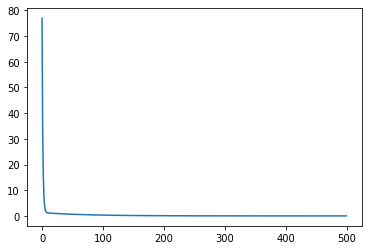

In [14]:
plt.plot(epoch_list,loss_list)
plt.show()

## torch.nn 

    # torch.nn은 torch.neural network 를 의미한다. 
    # nn.Module은 여러개의 레이어와 output을 return하는 forward(input) 메소드를 포함 
    
    # 모든 뉴럴 네트워크는 기본 클래스 nn.Module로부터 파생 
    # 생성자(constructor)에서 사용하고자 하는 모든 레이어를 선언 
    # forward(input)함수에서 입력으로부터 결과까지 모델이 어떻게 실행되는지 정의
    
    # torch.nn 은 mini-batch만을 지원. 전체 torch.nn 패키지는 mini-batch 형태 입력만 지원
    # 단일 데이터는 입력으로 지원 XXX
    # 만약 단일 샘플(1개의 데이터)이 있다면 input.unsqueeze(0)을 사용해, 가짜 임시 배치 차원 추가
    

In [18]:
#2019 version

import torch 
from torch.autograd import Variable
import matplotlib.pyplot as plt

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]])) # x data set
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))  # y data set 

class Model(torch.nn.Module):  # model class 생성   
    
    def __init__(self):     
        """
        In the constructor we instantiate two nn.Linear module 
        """
        super(Model, self).__init__() 
        self.linear = torch.nn.Linear(1, 1) # One in and one out
        #1개 인풋과 1개 아웃풋 
    def forward(self, x): 
        """
        In the forward function we accept a Variable of input data and we must return a Variable of output data. 
        We can use Modules defined in the constructor as well as arbitrary operators on Variables. 
        """
        y_pred = self.linear(x)  # linear regression  
        return y_pred
# our model 
model = Model()

# Construct our loss function and an Optimizer. The call to model.parameters() 
# in the SGD constructor will contain the learnable parameters of the two 
# nn.Linear modules which are members of the model. 

criterion = torch.nn.MSELoss(size_average=False)  # MSE loss 계산 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #to use stochastic gradient descent for optimization  

# for visualization
epoch_list = []  
loss_list = []  

# Training loop 
for epoch in range(500): 
    
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss 
    loss = criterion(y_pred, y_data) 
    print(epoch, loss.data)  
    
    epoch_list.append(epoch)
    loss_list.append(loss)

    # Zero gradients, perform a backward pass, and update the weights. 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step()

# After training 
hour_var = Variable(torch.Tensor([[4.0]]))  #get value one 
y_pred = model(hour_var) #pass this value to the model 
print("predict (after training)", 4, model(hour_var).data[0][0])



C:\Users\chon0\Anaconda3\envs\develroom\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 tensor(83.9580)
1 tensor(37.7934)
2 tensor(17.2362)
3 tensor(8.0788)
4 tensor(3.9964)
5 tensor(2.1732)
6 tensor(1.3560)
7 tensor(0.9866)
8 tensor(0.8166)
9 tensor(0.7355)
10 tensor(0.6941)
11 tensor(0.6704)
12 tensor(0.6546)
13 tensor(0.6425)
14 tensor(0.6320)
15 tensor(0.6224)
16 tensor(0.6132)
17 tensor(0.6043)
18 tensor(0.5956)
19 tensor(0.5870)
20 tensor(0.5786)
21 tensor(0.5702)
22 tensor(0.5620)
23 tensor(0.5540)
24 tensor(0.5460)
25 tensor(0.5381)
26 tensor(0.5304)
27 tensor(0.5228)
28 tensor(0.5153)
29 tensor(0.5079)
30 tensor(0.5006)
31 tensor(0.4934)
32 tensor(0.4863)
33 tensor(0.4793)
34 tensor(0.4724)
35 tensor(0.4656)
36 tensor(0.4589)
37 tensor(0.4523)
38 tensor(0.4458)
39 tensor(0.4394)
40 tensor(0.4331)
41 tensor(0.4269)
42 tensor(0.4208)
43 tensor(0.4147)
44 tensor(0.4087)
45 tensor(0.4029)
46 tensor(0.3971)
47 tensor(0.3914)
48 tensor(0.3857)
49 tensor(0.3802)
50 tensor(0.3747)
51 tensor(0.3694)
52 tensor(0.3640)
53 tensor(0.3588)
54 tensor(0.3537)
55 tensor(0.3486)

439 tensor(0.0013)
440 tensor(0.0013)
441 tensor(0.0013)
442 tensor(0.0013)
443 tensor(0.0013)
444 tensor(0.0012)
445 tensor(0.0012)
446 tensor(0.0012)
447 tensor(0.0012)
448 tensor(0.0012)
449 tensor(0.0012)
450 tensor(0.0011)
451 tensor(0.0011)
452 tensor(0.0011)
453 tensor(0.0011)
454 tensor(0.0011)
455 tensor(0.0011)
456 tensor(0.0011)
457 tensor(0.0010)
458 tensor(0.0010)
459 tensor(0.0010)
460 tensor(0.0010)
461 tensor(0.0010)
462 tensor(0.0010)
463 tensor(0.0009)
464 tensor(0.0009)
465 tensor(0.0009)
466 tensor(0.0009)
467 tensor(0.0009)
468 tensor(0.0009)
469 tensor(0.0009)
470 tensor(0.0009)
471 tensor(0.0008)
472 tensor(0.0008)
473 tensor(0.0008)
474 tensor(0.0008)
475 tensor(0.0008)
476 tensor(0.0008)
477 tensor(0.0008)
478 tensor(0.0008)
479 tensor(0.0008)
480 tensor(0.0007)
481 tensor(0.0007)
482 tensor(0.0007)
483 tensor(0.0007)
484 tensor(0.0007)
485 tensor(0.0007)
486 tensor(0.0007)
487 tensor(0.0007)
488 tensor(0.0007)
489 tensor(0.0007)
490 tensor(0.0006)
491 tensor(0